<a href="https://colab.research.google.com/github/MichalSlowakiewicz/Machine-Learning/blob/master/Homework8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework Assignment: Working with Other Loss Functions**

-------------------------------

During the class today, we reconstructed an **ellipse**. The ellipse was defined with two **foci** and $C$ (the sum of distances of the ellipse points from the foci).

To reconstruct the ellipse through optimization, we began with **$N$ points** scattered randomly in the 2D plane. Our goal was to adjust their positions so that they satisfy the elliptical constraint as closely as possible. We achieved this by minimizing the **error-related loss**, $L^{(2)}_{\text{ellipse}}$ which was defined in today's class with $\ell_2$ norm as:

$$
L^{(2)}_{\text{ellipse}} = \frac{1}{N} \sum_{i=1}^{N} \epsilon_i^2
$$

where
$$
 \epsilon_i = d_{i1} + d_{i2} - C
$$
where $N$ is the number of points, and $d_{i1}, d_{i2}$ are their distances to the two foci.

In the homework assignment you will experiment with 3 other loss definitions based on some other possible norms.



1. $\ell_0$ norm resulting in
  $$
  L^{(0)}_{\text{ellipse}} = \frac{1}{N} \sum_{i=1}^{N} \mathbf{1}(\epsilon_i \neq 0)
  $$
  - If you actually succeed to code this loss function, the question for you to answer in relation to $L^{(0)}_{\text{ellipse}}$ is why the training is not progressing with passing epochs.
  - If you actually fail to code this loss function, the question for you to answer is to explain the failure and reason out theoretically, why the training would not be progressing with passing epochs, anyway.

1. $\ell_1$ norm resulting in
  $$
  L^{(1)}_{\text{ellipse}} = \frac{1}{N} \sum_{i=1}^{N} |\epsilon_i|
  $$
  The question for you to answer in relation to $L^{(1)}_{\text{ellipse}}$ is why the training loss doesn't converge, even after the ellipse has been fully drawn.

1. $\ell_\infty$ norm resulting in
  $$
  L^{(\infty)}_{\text{ellipse}} =  \max_{i} |\epsilon_i|
  $$
  The question for you to answer in relation to $L^{(\infty)}_{\text{ellipse}}$ is why the training takes so long and it doesn't converge in the end, either.

## **Points to Note**

1. Draw both the shape that the points draw as they move, and the loss value after each epoch, just as we did in class today.

2. Note, that the purpose of this excercise is not that you reconstruct a perfect ellipse, but rather that you give it a try, and even if you fail you should document and explain the failure, and answer a question related to a given loss definition.

3. You can also play around with the learning rate to try to improve convergence.

## **Task & Deliverables**
  
   - Document your experiments (python code and charts) and **write down your conclusions** into the Colab notebook.
   - It is not strictly required, but **if you make a movie showing the optimization progress it will be considered a strong point of your solution**
     - You can make a movie programmatically as we did in clustering class (our second class) with EM clustering,
     - or, you can save to disk the image files with epoch charts and use an external tool to bind them into a movie. Provide links to movie files in the README.
   - Place the Colab notebook  with the solution in your **GitHub repository** for this course.
   - In your repository’s **README**, add a **link** to the notebook (and any movies you created) and also include an **“Open in Colab”** badge at the top of the notebook so it can be launched directly from GitHub.

## Sample code

   You can use the sample code provided below:



In [32]:
import torch
import matplotlib.pyplot as plt
import numpy as np


def plot_results(epoch, trajectories, loss_history=None):
    if loss_history is not None:
      fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    else:
      fig, axes = plt.subplots(1, 1, figsize=(6, 6))
      axes = [axes]
    points = np.array([trajectories[i][-1] for i in range(num_points)])
    # Left plot: Scatter of points with trajectories
    axes[0].scatter(points[:, 0], points[:, 1], label=f'Points - Epoch {epoch}')
    f1 = focus1.detach().cpu().numpy()
    f2 = focus2.detach().cpu().numpy()
    axes[0].scatter([f1[0], f2[0]], [f1[1], f2[1]], color='red', marker='x', s=100, label='Foci')

    # Draw movement traces
    for i in range(num_points):
        trajectory = np.array(trajectories[i])
        axes[0].plot(trajectory[:, 0], trajectory[:, 1], color='gray', linestyle='-', linewidth=0.5)

    axes[0].set_xlabel('X')
    axes[0].set_ylabel('Y')
    axes[0].legend()


    axes[0].grid()

    if loss_history is not None:
      axes[0].set_title(f'Points after Epoch {epoch}')
      # Right plot: Loss history
      axes[1].plot(loss_history, color='blue')
      axes[1].set_xlabel("Epoch")
      axes[1].set_ylabel("Loss")
      axes[1].set_title("Loss Convergence")
      axes[1].grid()
    else:
      axes[0].set_title(f'Points before Epoch {epoch}')


    filename = f"frames2/frame_{epoch:04d}.png"
    plt.savefig(filename)
    plt.close()  # Important to avoid memory overflow

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Fix the random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Define ellipse parameters
focus1 = torch.tensor([-2.0, 0.0])  # First focus
focus2 = torch.tensor([2.0, 0.0])   # Second focus
constant_sum = 6.0  # The sum of distances to the two foci

# Initialize random 2D points from uniform distribution
num_points = 100
points = torch.rand((num_points, 2)) * 10 - 5  # Uniformly distributed in [-5, 5]
points.requires_grad = True

# Reset trajectories
trajectories = [[] for _ in range(num_points)]
loss_history = []



import time
# Start timing
start_time = time.time()


# Define optimizer
optimizer = torch.optim.Adam([points], lr=0.1)

# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    optimizer.zero_grad()

    # Compute distances to both foci
    dist1 = torch.norm(points - focus1, dim=1)
    dist2 = torch.norm(points - focus2, dim=1)
    eps = dist1 + dist2 - constant_sum

    # Compute loss - it is implemented as MSE loss related to l_2 norm
    # TODO: your job is to replace the line below
    # with l_0, l_1 and l_infty - related loss
    loss = torch.mean((eps != 0).float())

    loss.backward()
    optimizer.step()

    loss_history.append(loss.item())

    # Store current positions for tracking movement
    for i in range(num_points):
        trajectories[i].append(points[i].detach().cpu().clone().numpy())

    # Plot results every 10th epoch
    if epoch % 10 == 0:
        plot_results(epoch, trajectories, loss_history)

    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.6f}")

#Final plot
plot_results(epoch, trajectories, loss_history)


# End timing
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")



RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

Epoch 0: Loss = 2.754212


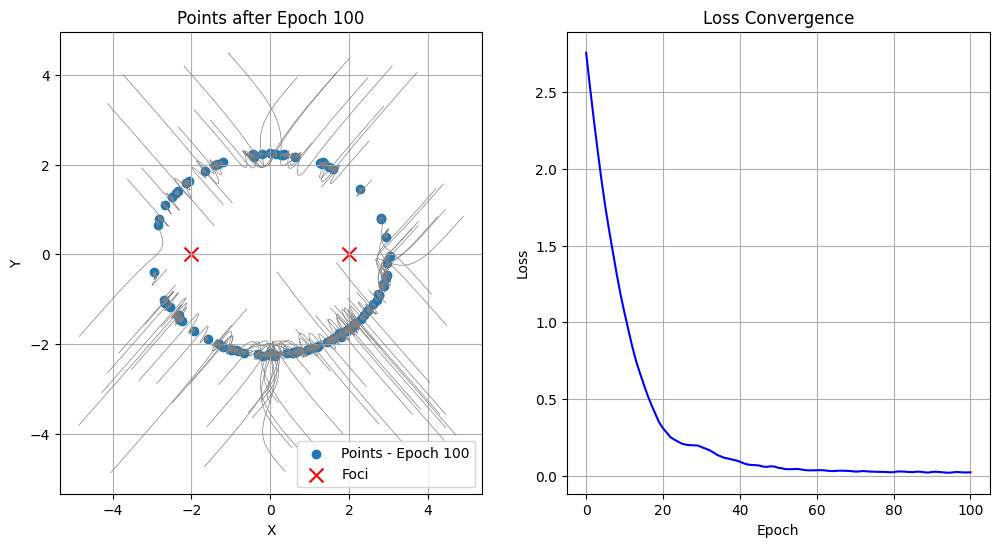

Epoch 100: Loss = 0.024422


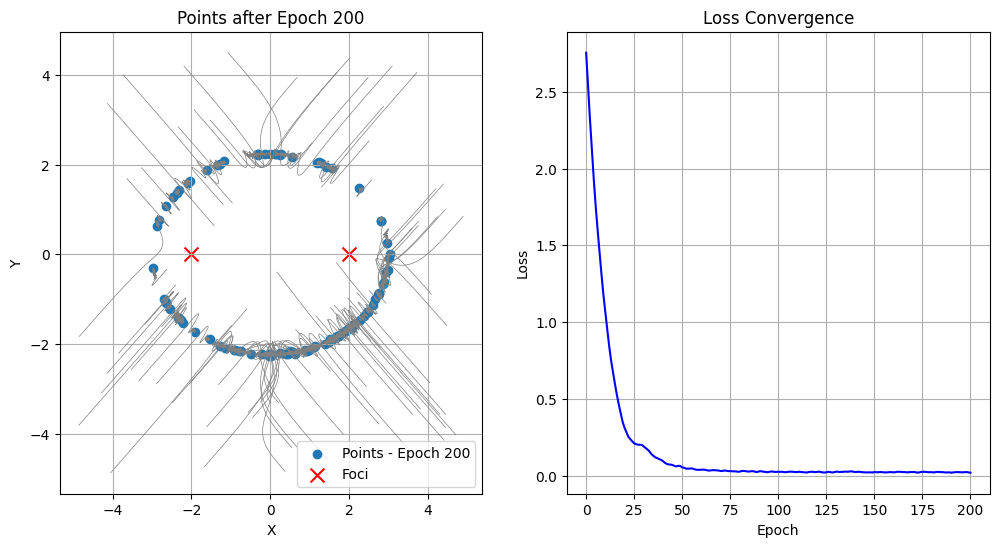

Epoch 200: Loss = 0.018269


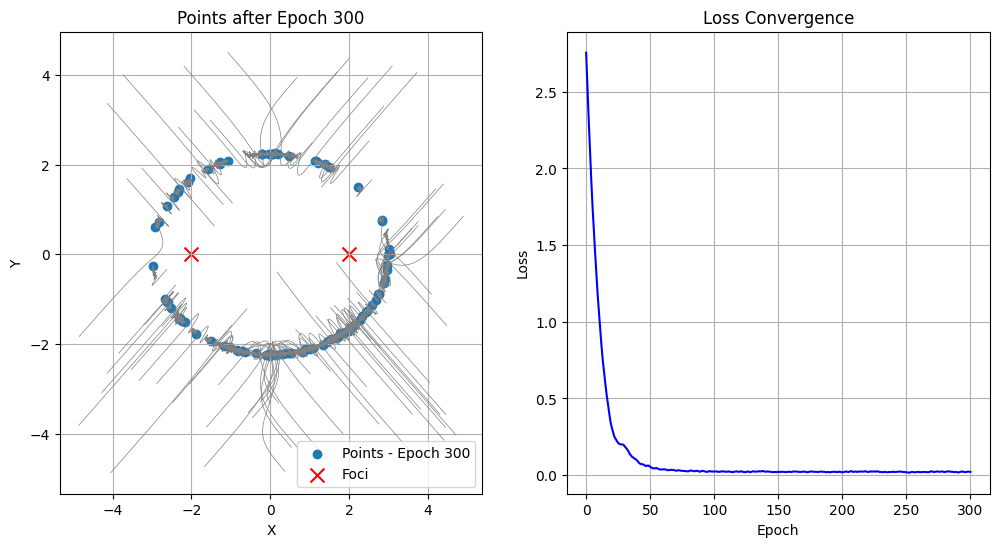

Epoch 300: Loss = 0.021560


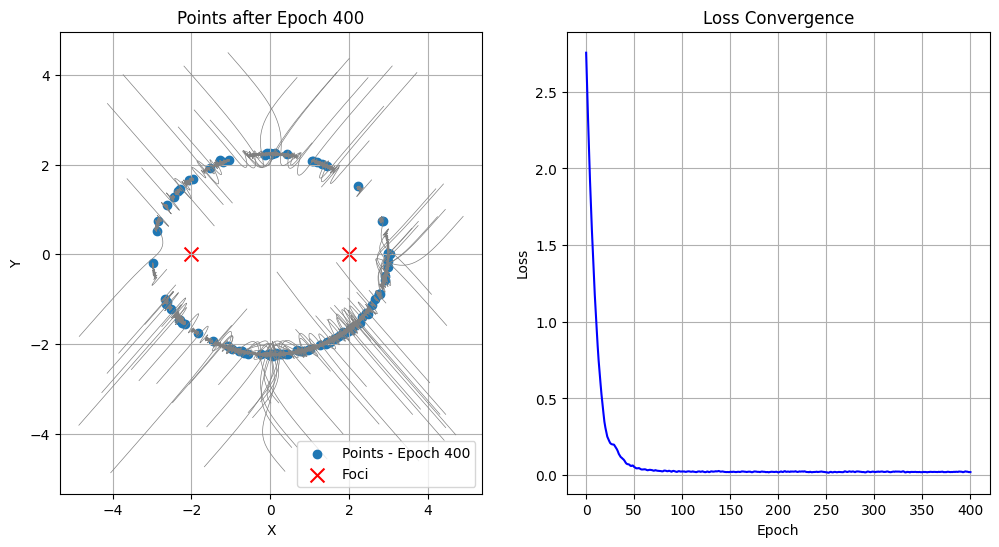

Epoch 400: Loss = 0.020092


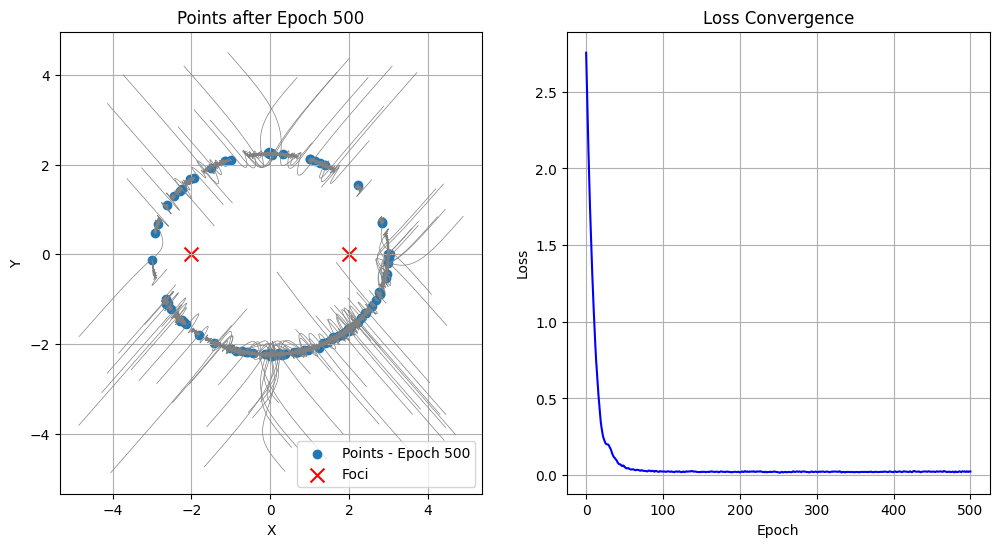

Epoch 500: Loss = 0.023886


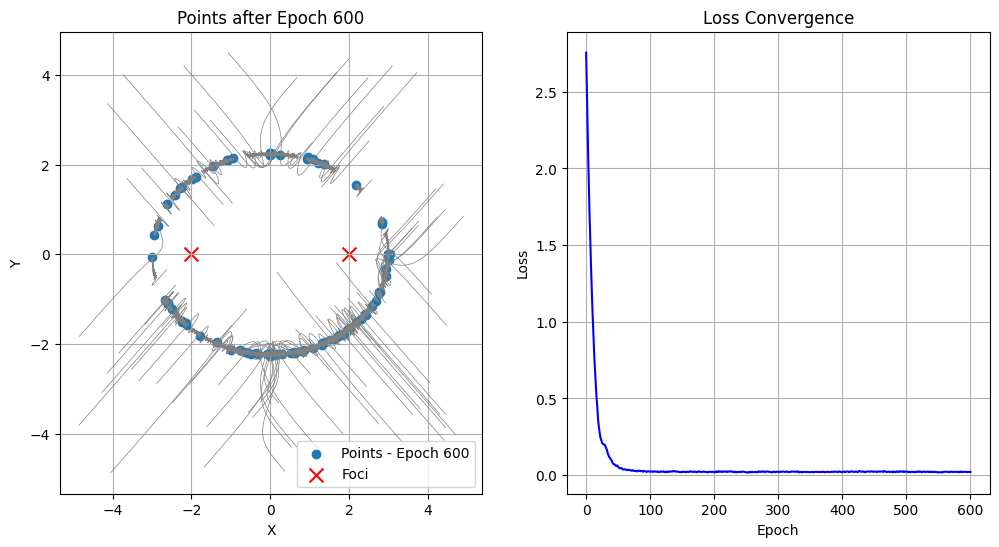

Epoch 600: Loss = 0.021060


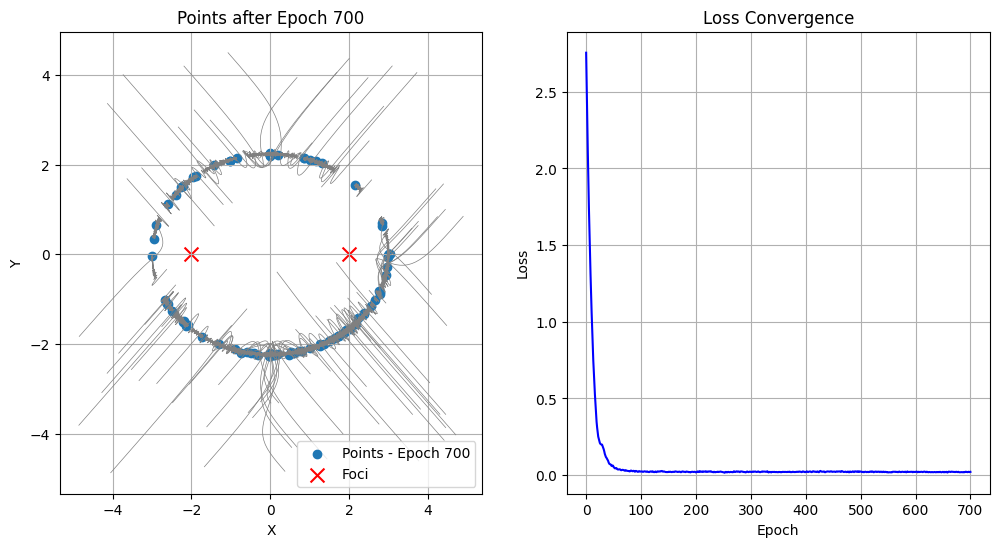

Epoch 700: Loss = 0.021499


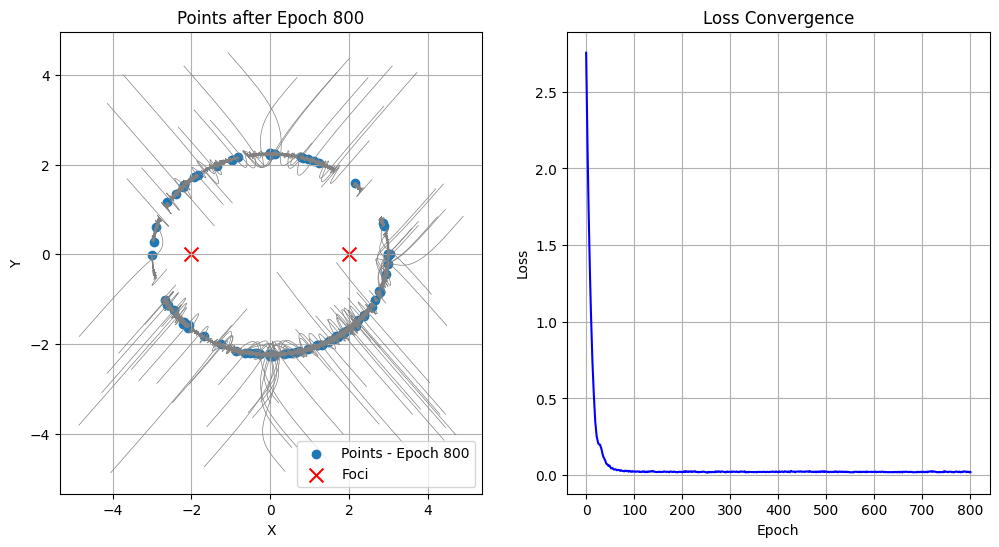

Epoch 800: Loss = 0.020739


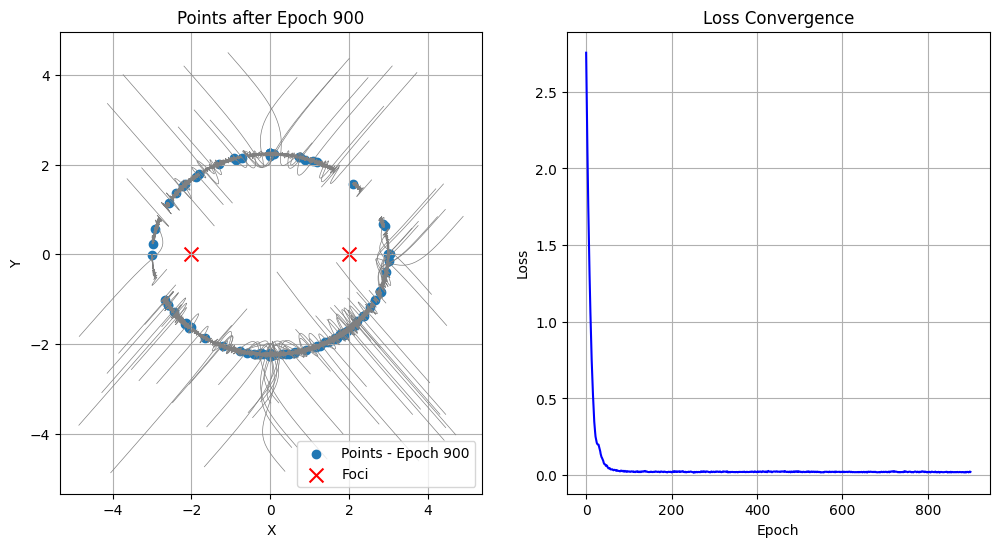

Epoch 900: Loss = 0.021521


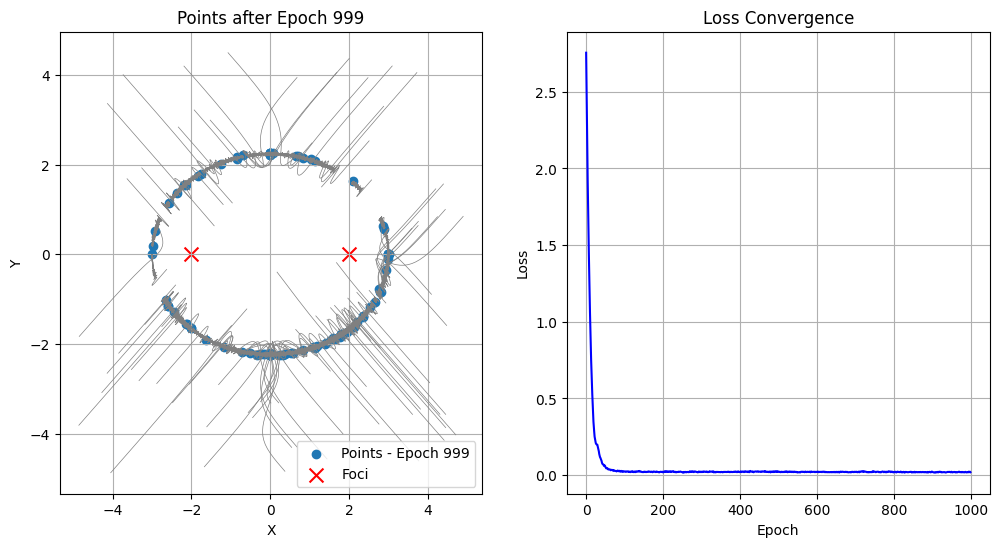

Elapsed time: 9.595816135406494 seconds


In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Fix the random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Define ellipse parameters
focus1 = torch.tensor([-2.0, 0.0])  # First focus
focus2 = torch.tensor([2.0, 0.0])   # Second focus
constant_sum = 6.0  # The sum of distances to the two foci

# Initialize random 2D points from uniform distribution
num_points = 100
points = torch.rand((num_points, 2)) * 10 - 5  # Uniformly distributed in [-5, 5]
points.requires_grad = True

# Reset trajectories
trajectories = [[] for _ in range(num_points)]
loss_history = []



import time
# Start timing
start_time = time.time()


# Define optimizer
optimizer = torch.optim.Adam([points], lr=0.1)

# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    optimizer.zero_grad()

    # Compute distances to both foci
    dist1 = torch.norm(points - focus1, dim=1)
    dist2 = torch.norm(points - focus2, dim=1)
    eps = dist1 + dist2 - constant_sum

    # Compute loss - it is implemented as MSE loss related to l_2 norm
    # TODO: your job is to replace the line below
    # with l_0, l_1 and l_infty - related loss
    loss = torch.mean(torch.abs(eps))

    loss.backward()
    optimizer.step()

    loss_history.append(loss.item())

    # Store current positions for tracking movement
    for i in range(num_points):
        trajectories[i].append(points[i].detach().cpu().clone().numpy())

    # Plot results every 10th epoch
    if epoch % 100 == 0:
        plot_results(epoch, trajectories, loss_history)

    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.6f}")

#Final plot
plot_results(epoch, trajectories, loss_history)


# End timing
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")


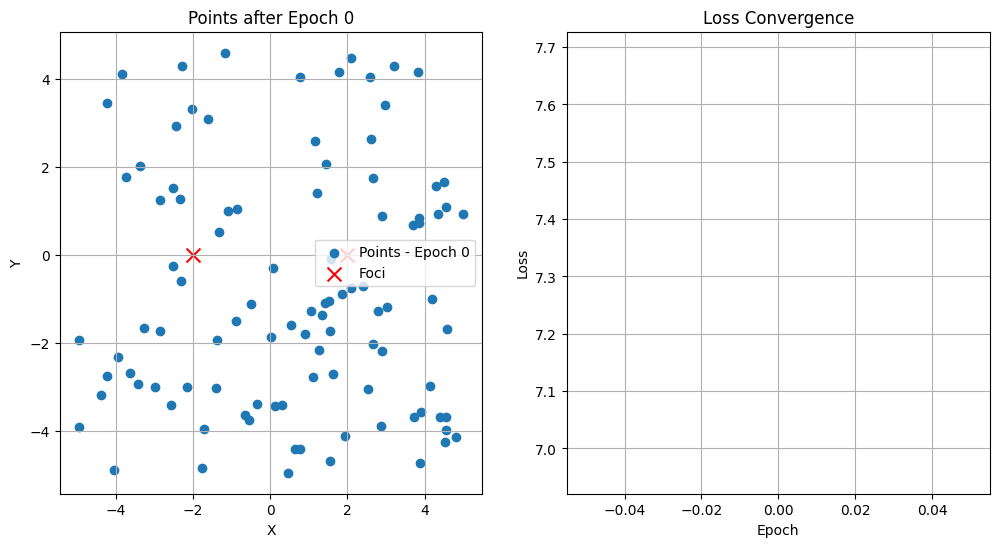

Epoch 0: Loss = 7.323938


Epoch 100: Loss = 2.393175


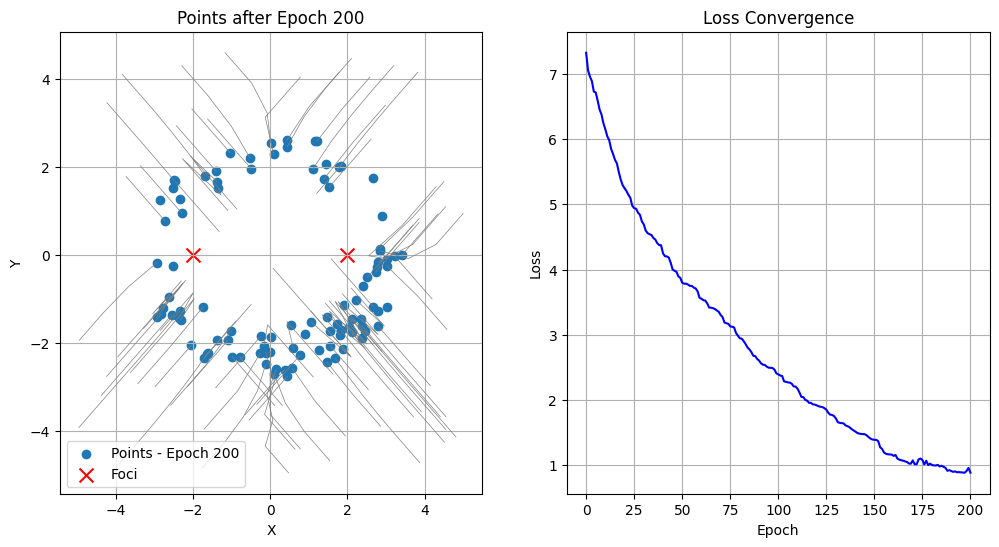

Epoch 200: Loss = 0.886059


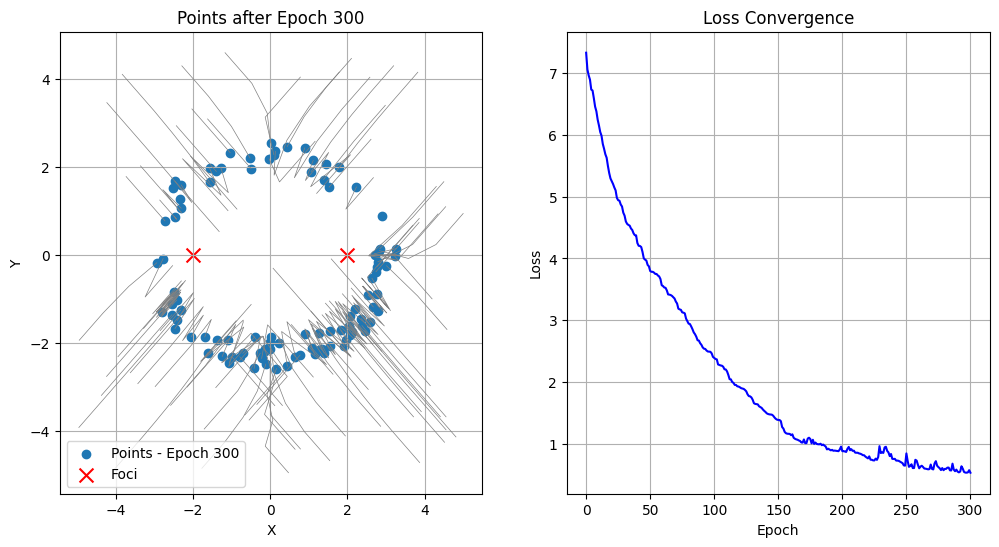

Epoch 300: Loss = 0.537401


Epoch 400: Loss = 0.450674


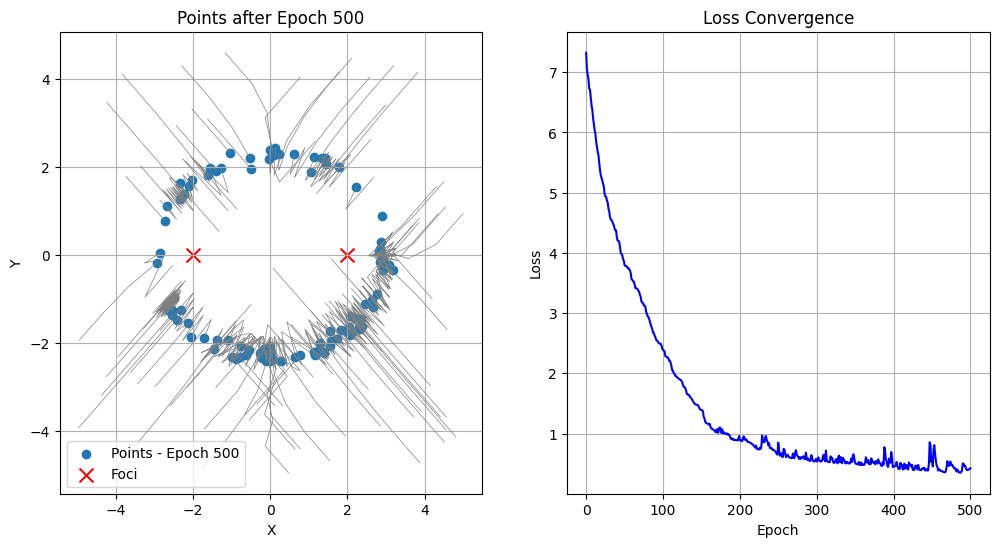

Epoch 500: Loss = 0.422950


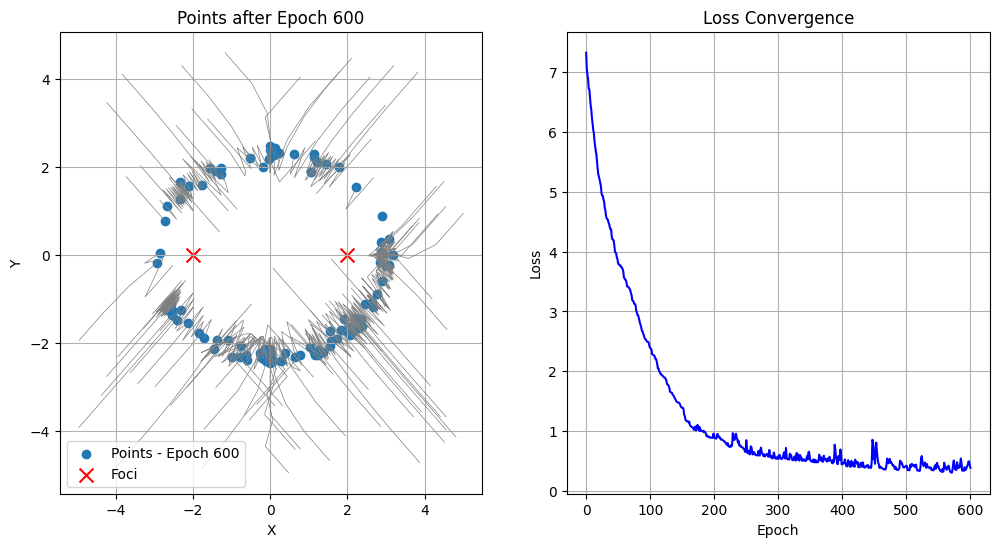

Epoch 600: Loss = 0.386727


Epoch 700: Loss = 0.477610


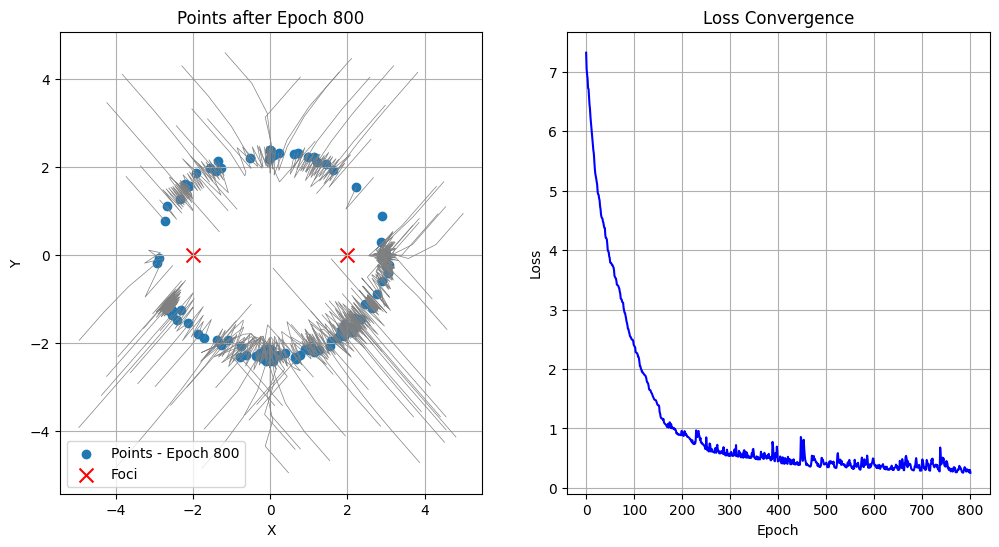

Epoch 800: Loss = 0.254017


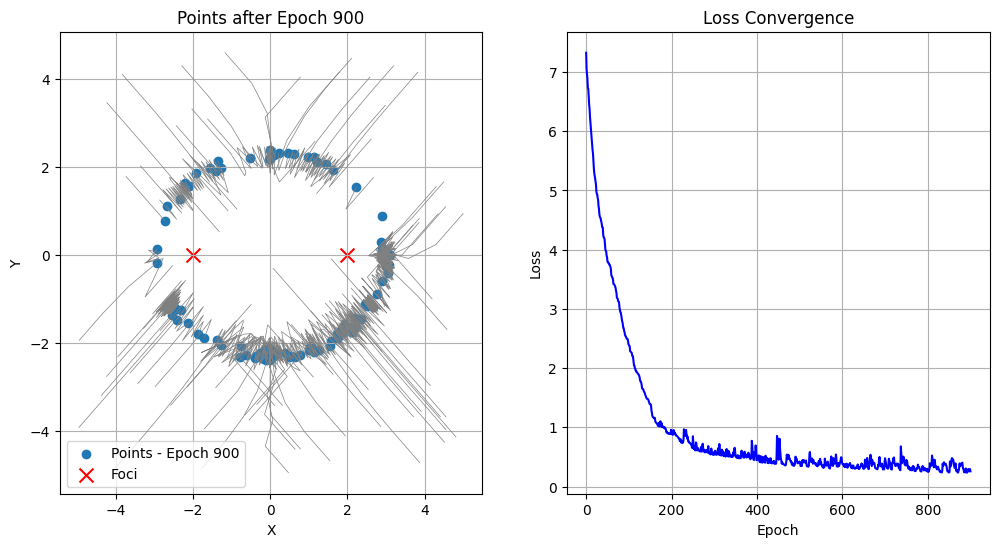

Epoch 900: Loss = 0.257051


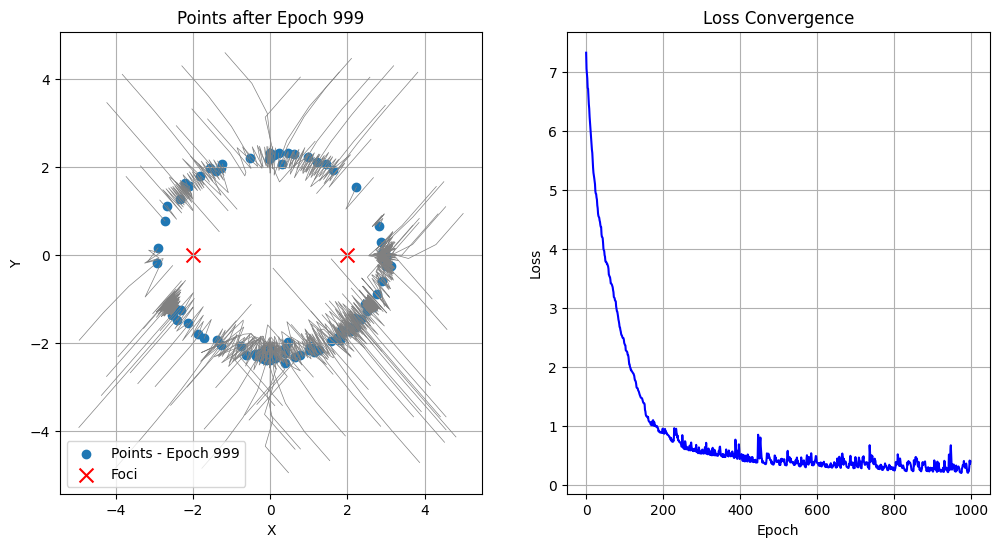

Elapsed time: 10.217893838882446 seconds


In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Fix the random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Define ellipse parameters
focus1 = torch.tensor([-2.0, 0.0])  # First focus
focus2 = torch.tensor([2.0, 0.0])   # Second focus
constant_sum = 6.0  # The sum of distances to the two foci

# Initialize random 2D points from uniform distribution
num_points = 100
points = torch.rand((num_points, 2)) * 10 - 5  # Uniformly distributed in [-5, 5]
points.requires_grad = True

# Reset trajectories
trajectories = [[] for _ in range(num_points)]
loss_history = []



import time
# Start timing
start_time = time.time()


# Define optimizer
optimizer = torch.optim.Adam([points], lr=0.1)

# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    optimizer.zero_grad()

    # Compute distances to both foci
    dist1 = torch.norm(points - focus1, dim=1)
    dist2 = torch.norm(points - focus2, dim=1)
    eps = dist1 + dist2 - constant_sum

    # Compute loss - it is implemented as MSE loss related to l_2 norm
    # TODO: your job is to replace the line below
    # with l_0, l_1 and l_infty - related loss
    loss = torch.max(torch.abs(eps))

    loss.backward()
    optimizer.step()

    loss_history.append(loss.item())

    # Store current positions for tracking movement
    for i in range(num_points):
        trajectories[i].append(points[i].detach().cpu().clone().numpy())

    # Plot results every 10th epoch
    if epoch % 100 == 0:
        plot_results(epoch, trajectories, loss_history)

    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.6f}")

#Final plot
plot_results(epoch, trajectories, loss_history)


# End timing
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time} seconds")

Epoch 0: Loss = 2.754212
Epoch 10: Loss = 1.059926
Epoch 20: Loss = 0.310943
Epoch 30: Loss = 0.188926
Epoch 40: Loss = 0.093729
Epoch 50: Loss = 0.053497
Epoch 60: Loss = 0.037769
Epoch 70: Loss = 0.029401
Epoch 80: Loss = 0.025541
Epoch 90: Loss = 0.026995
Epoch 100: Loss = 0.024422
Epoch 110: Loss = 0.022661
Epoch 120: Loss = 0.023052
Epoch 130: Loss = 0.024824
Epoch 140: Loss = 0.022773
Epoch 150: Loss = 0.022459
Epoch 160: Loss = 0.020810
Epoch 170: Loss = 0.022611
Epoch 180: Loss = 0.021731
Epoch 190: Loss = 0.018421
Epoch 200: Loss = 0.018269
Epoch 210: Loss = 0.023981
Epoch 220: Loss = 0.021062
Epoch 230: Loss = 0.020594
Epoch 240: Loss = 0.022908
Epoch 250: Loss = 0.019486
Epoch 260: Loss = 0.020366
Epoch 270: Loss = 0.024502
Epoch 280: Loss = 0.019642
Epoch 290: Loss = 0.018578
Epoch 300: Loss = 0.021560
Epoch 310: Loss = 0.021064
Epoch 320: Loss = 0.023591
Epoch 330: Loss = 0.025661
Epoch 340: Loss = 0.020722
Epoch 350: Loss = 0.019547
Epoch 360: Loss = 0.020766
Epoch 370: L

<ipython-input-36-0b501ce906e3>:68: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(os.path.join("frames2", filename))


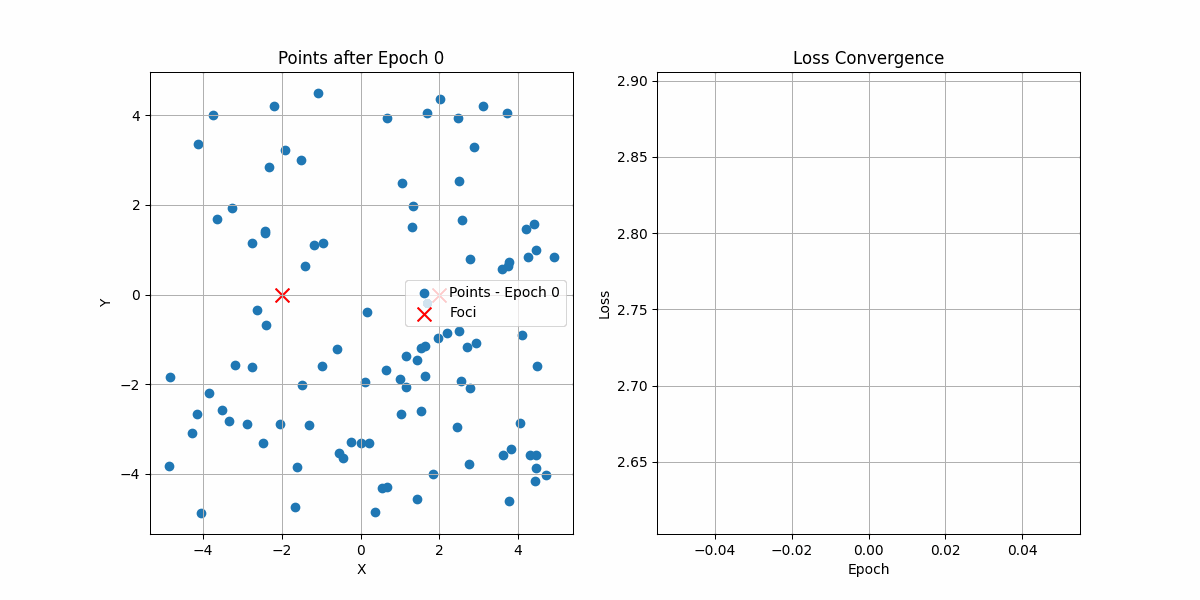

In [36]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import os
import imageio
from IPython.display import Image

# Fix the random seed
torch.manual_seed(42)
np.random.seed(42)

# Define ellipse parameters
focus1 = torch.tensor([-2.0, 0.0])
focus2 = torch.tensor([2.0, 0.0])
constant_sum = 6.0

# Initialize random points
num_points = 100
points = torch.rand((num_points, 2)) * 10 - 5
points.requires_grad = True

# Reset trajectories
trajectories = [[] for _ in range(num_points)]
loss_history = []

# Make a folder to save images
os.makedirs("frames2", exist_ok=True)



# Training
optimizer = torch.optim.Adam([points], lr=0.1)
num_epochs = 1000

for epoch in range(num_epochs):
    optimizer.zero_grad()

    dist1 = torch.norm(points - focus1, dim=1)
    dist2 = torch.norm(points - focus2, dim=1)
    eps = dist1 + dist2 - constant_sum

    # Using L1 loss here (|eps|)
    loss = torch.mean(torch.abs(eps))

    loss.backward()
    optimizer.step()

    loss_history.append(loss.item())

    for i in range(num_points):
        trajectories[i].append(points[i].detach().cpu().clone().numpy())

    if epoch % 10 == 0:
        plot_results(epoch, trajectories, loss_history)

    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.6f}")

# Save final plot
plot_results(epoch, trajectories, loss_history)

# Animation

# Read all frames
frames2 = []
filenames = sorted([f for f in os.listdir("frames2") if f.endswith(".png")])
for filename in filenames:
    image = imageio.imread(os.path.join("frames2", filename))
    frames2.append(image)

# Save to gif
imageio.mimsave("ellipse_training2.gif", frames2, duration=0.2)  # duration=seconds per frame

Image("ellipse_training2.gif")


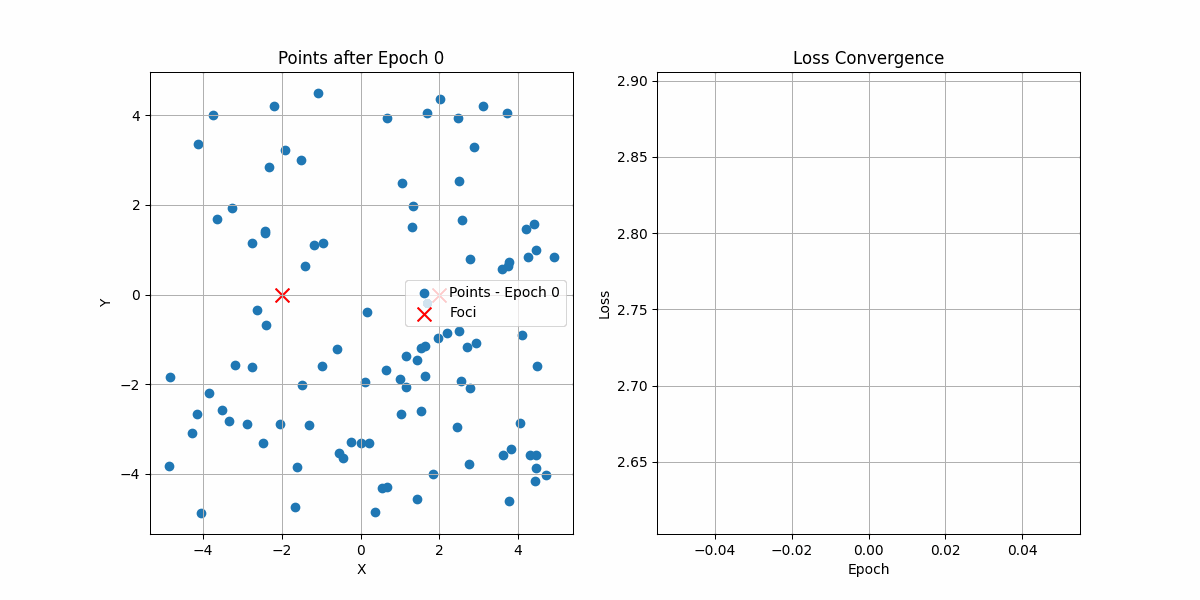

In [35]:
Image("ellipse_training2.gif")
